In [1]:
import tensorflow as tf
import os
import cv2
import stat
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# if using gpus to run ANN, allocates only certain amount of GPU memory towards ANN
gpu_list = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpu_list:
    tf.config.experimental.set_memory_growth(gpu, True)

Removing image images_satellite_parts\deployable booms\COMPONENTS2.jpg
Removing image images_satellite_parts\deployable booms\figure1.gif
Removing image images_satellite_parts\deployable booms\figure2.gif
Removing image images_satellite_parts\deployable booms\figure7.gif
Removing image images_satellite_parts\deployable booms\Solar_Orbiter_boom_deployment_and_first_magnetic_field_measurements_pillars.gif
Removing image images_satellite_parts\deployable booms\vector.svg
Removing image images_satellite_parts\deployable booms\vector10.svg
Removing image images_satellite_parts\deployable booms\vector11.svg
Removing image images_satellite_parts\deployable booms\vector12.svg
Removing image images_satellite_parts\deployable booms\vector13.svg
Removing image images_satellite_parts\deployable booms\vector14.svg
Removing image images_satellite_parts\deployable booms\vector2.svg
Removing image images_satellite_parts\deployable booms\vector3.svg
Removing image images_satellite_parts\deployable boom

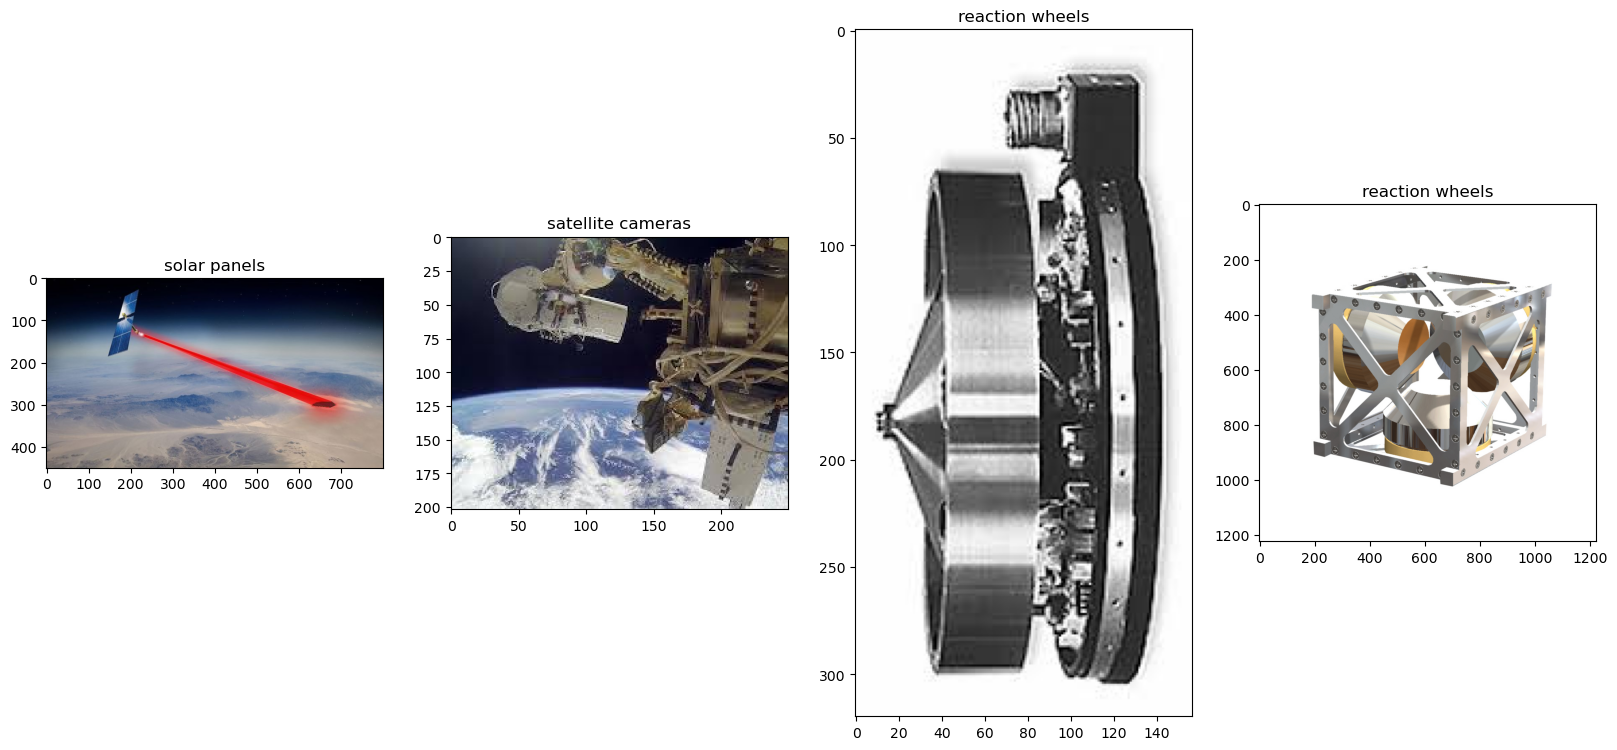

In [2]:
# remove unsupported image files from the directory
img_directory = 'images_satellite_parts'
for img_class in os.listdir(img_directory):
    for img in os.listdir(os.path.join(img_directory, img_class)):
        img_path = os.path.join(img_directory, img_class, img)
        img_type = imghdr.what(img_path)
        if img_type not in ['jpeg', 'jpg', 'png']:
            print('Removing image {}'.format(img_path))
            os.chmod(img_path, stat.S_IWRITE)
            os.remove(img_path)

# creating a dataset to print 4 random images
image_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
data_generator = image_datagen.flow_from_directory(
    img_directory,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True)

# plots the 4 images
class_labels = list(data_generator.class_indices.keys())
plt.figure(figsize = (20, 20))
for i in range(4):
    random_index = np.random.randint(0, len(data_generator.filenames))
    img_path = os.path.join(img_directory, data_generator.filenames[random_index])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(class_labels[int(data_generator.labels[random_index])])
plt.show()

In [3]:
# ImageDataGenerator creation
image_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

# creating training dataset
train_generator = image_datagen.flow_from_directory(
    img_directory,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True)

# creating validation dataset
validation_generator = image_datagen.flow_from_directory(
    img_directory,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = True)

Found 451 images belonging to 4 classes.
Found 111 images belonging to 4 classes.


In [12]:
#building the model
input_layer = Input(shape=(256, 256, 3))
conv_1 = Conv2D(4, (3, 3), 1, activation='relu')(input_layer)
batchnorm_1 = BatchNormalization()(conv_1)
maxpool_1 = MaxPooling2D()(batchnorm_1)
conv_3 = Conv2D(16, (3, 3), 1, activation='relu')(maxpool_1)
batchnorm_3 = BatchNormalization()(conv_3)
maxpool_3 = MaxPooling2D()(batchnorm_3)
flatten = Flatten()(maxpool_3)
dropout_1 = Dropout(0.5)(flatten)
dense1 = Dense(32, activation='relu')(dropout_1)
dropout_2 = Dropout(0.5)(dense1)
output_layer = Dense(len(train_generator.class_indices), activation='softmax')(dropout_2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_17 (Conv2D)          (None, 254, 254, 4)       112       
                                                                 
 batch_normalization_17 (Ba  (None, 254, 254, 4)       16        
 tchNormalization)                                               
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 127, 127, 4)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 125, 125, 8)       296       
                                                                 
 batch_normalization_18 (Ba  (None, 125, 125, 8)       32  

In [13]:
# training the model
trained_model = model.fit(train_generator, epochs = 20, validation_data = validation_generator)

Epoch 1/20
15/15 [==============================] - 15s 784ms/step - loss: 3.0182 - accuracy: 0.2882 - val_loss: 1.3512 - val_accuracy: 0.3153
Epoch 2/20
15/15 [==============================] - 11s 773ms/step - loss: 1.4463 - accuracy: 0.3503 - val_loss: 1.3205 - val_accuracy: 0.3784
Epoch 3/20
15/15 [==============================] - 11s 769ms/step - loss: 1.1899 - accuracy: 0.4523 - val_loss: 1.4698 - val_accuracy: 0.3153
Epoch 4/20
15/15 [==============================] - 13s 901ms/step - loss: 1.1770 - accuracy: 0.4324 - val_loss: 1.6441 - val_accuracy: 0.3153
Epoch 5/20
15/15 [==============================] - 18s 1s/step - loss: 1.0575 - accuracy: 0.4545 - val_loss: 2.0377 - val_accuracy: 0.2703
Epoch 6/20
15/15 [==============================] - 20s 1s/step - loss: 1.0684 - accuracy: 0.4789 - val_loss: 2.2272 - val_accuracy: 0.2703
Epoch 7/20
15/15 [==============================] - 14s 970ms/step - loss: 1.0119 - accuracy: 0.4967 - val_loss: 1.9123 - val_accuracy: 0.2883
Epoch

KeyboardInterrupt: 

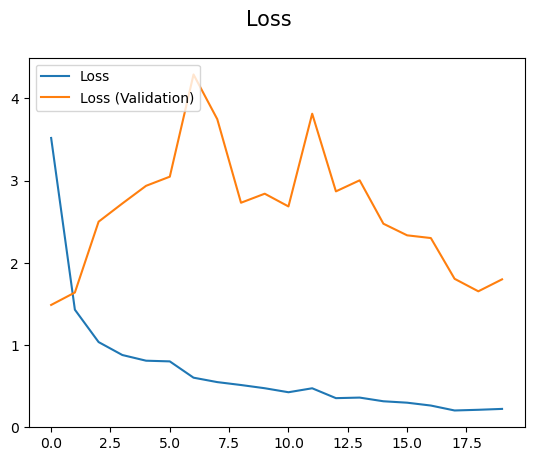

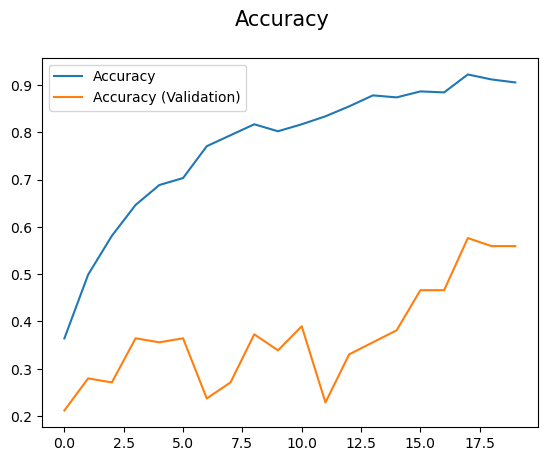

In [ ]:
# plotting loss function
fig = plt.figure()
plt.plot(trained_model.history['loss'], label = 'Loss')
plt.plot(trained_model.history['val_loss'], label = 'Loss (Validation)')
fig.suptitle('Loss', fontsize = 15)
plt.legend(loc = "upper left")
plt.show()

# plotting accuracy function
fig = plt.figure()
plt.plot(trained_model.history['accuracy'], label = 'Accuracy')
plt.plot(trained_model.history['val_accuracy'], label = 'Accuracy (Validation)')
fig.suptitle('Accuracy', fontsize = 15)
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# evaluating accuracy on the testing set
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

4/4 [==============================] - 3s 924ms/step - loss: 1.7980 - accuracy: 0.5593
Test Accuracy: 55.93%


1/1 [==============================] - 0s 33ms/step
Predicted class: rcs


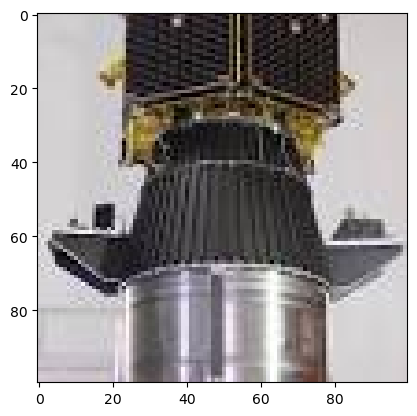

In [ ]:
# making predictions on a sample image
test_image_path = "images_satellite_parts\deployable booms\image8.jpeg"
test_image = cv2.imread(test_image_path)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
test_image = tf.image.resize(test_image, (256, 256))
test_image = np.expand_dims(test_image / 255, 0)

predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())

print(f"Predicted class: {class_labels[predicted_class]}")